# 😮 Image Classification: recognizing 37 breeds of cats and dogs

<img src="http://www.evanmarie.com/content/files/notebook_images/37_cats_dogs_breeds.png" width=600>

## Installing and importing all the necessities:

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

In [2]:
torch.cuda.is_available()

True

In [3]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path

## Dataloader creation:

In [4]:
dog_breeds = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files, 
                 splitter = RandomSplitter(seed=23),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224, min_scale=0.75))

loaders = dog_breeds.dataloaders(path/"images")

## A batch of cuties:

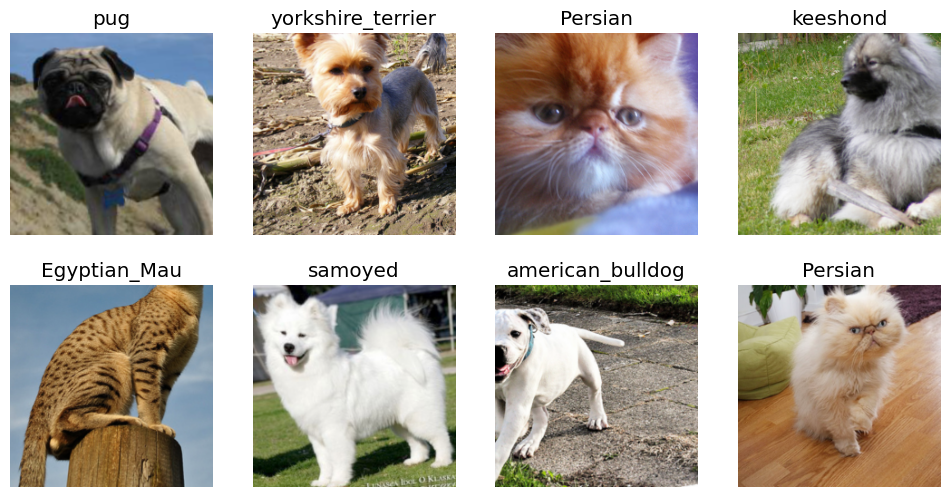

In [5]:
loaders.show_batch(nrows = 2, ncols = 4)

## Model definition and training (part one):

In [6]:
%%capture
model = vision_learner(loaders, resnet34, metrics = accuracy)

In [7]:
model.fine_tune(10, base_lr=0.0003, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy,time
0,4.607321,3.018049,0.177267,01:00
1,2.928612,1.041061,0.724628,00:59
2,1.508610,0.483919,0.853180,00:58
3,0.897949,0.345260,0.889039,00:58


epoch,train_loss,valid_loss,accuracy,time
0,0.635342,0.313394,0.903248,01:01
1,0.559850,0.266534,0.915426,01:01
2,0.471213,0.239511,0.925575,01:01
3,0.385219,0.217322,0.933694,01:00
4,0.318662,0.204118,0.935724,01:00
5,0.267272,0.209990,0.937754,01:00
6,0.229862,0.194458,0.939107,01:01
7,0.218802,0.192222,0.939784,01:03
8,0.200345,0.191764,0.944520,01:00
9,0.201430,0.192547,0.940460,01:01


## A ridiculously large confusion matrix:

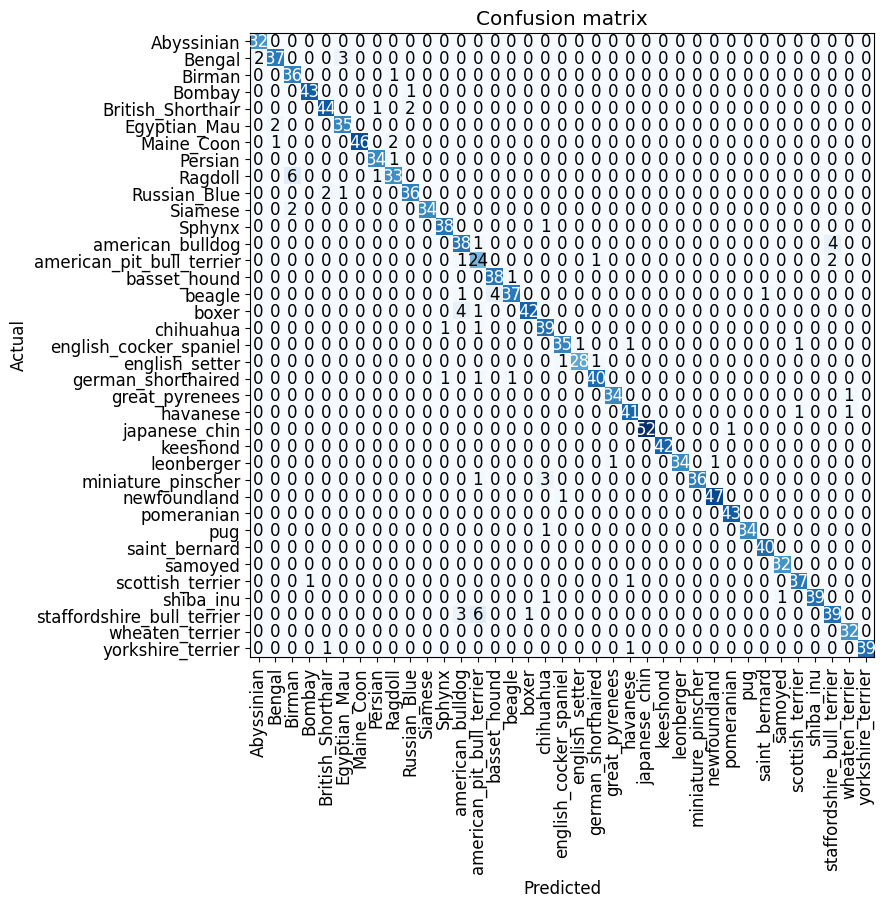

In [8]:
interpretation = ClassificationInterpretation.from_learner(model)
interpretation.plot_confusion_matrix(figsize = (9,9))

## Who did it confuse with whom?

In [9]:
confused = interpretation.most_confused(min_val=3)

for confusion in confused:
  print(f"{confusion[0]} - {confusion[1]} - {confusion[2]} times.")

Ragdoll - Birman - 6 times.
staffordshire_bull_terrier - american_pit_bull_terrier - 6 times.
american_bulldog - staffordshire_bull_terrier - 4 times.
beagle - basset_hound - 4 times.
boxer - american_bulldog - 4 times.
Bengal - Egyptian_Mau - 3 times.
miniature_pinscher - chihuahua - 3 times.
staffordshire_bull_terrier - american_bulldog - 3 times.


## Defining and training the model (part two) with discriminative learning rate:

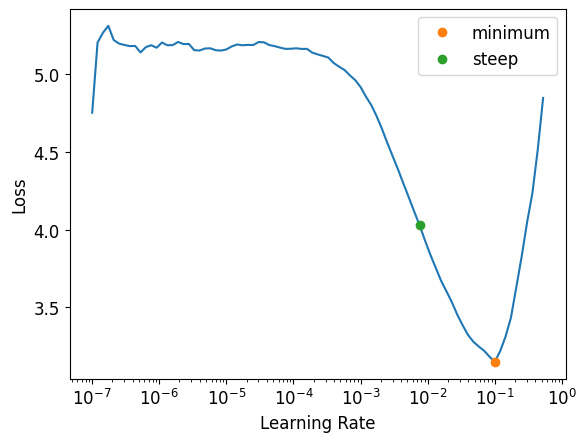

In [10]:
# Finding best learning rate
model = vision_learner(loaders, resnet34, metrics = accuracy)
minimum_lr, steepest = model.lr_find(suggest_funcs=(minimum, steep))

epoch,train_loss,valid_loss,accuracy,time
0,0.986494,0.847725,0.771313,00:58
1,0.740336,0.400580,0.878890,00:57
2,0.418612,0.263149,0.915426,00:58


SuggestedLRs(valley=4.365158383734524e-05)

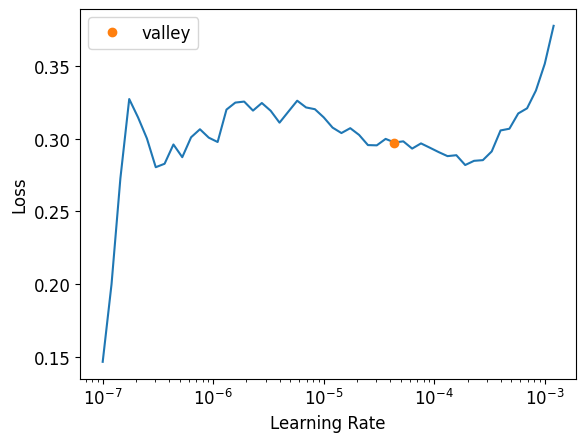

In [11]:
# Method of unfreezing the model method with discriminative learning rates
# as described in chapter 5
model = vision_learner(loaders, resnet34, metrics = accuracy)
model.fit_one_cycle(3, 0.008)
model.unfreeze()
model.lr_find()

## Experimenting with learning rates for the final layer:

In [13]:
model.fit_one_cycle(8, lr_max=slice(0.000001, 0.00008))

epoch,train_loss,valid_loss,accuracy,time
0,0.119501,0.212431,0.935047,01:00
1,0.115471,0.210126,0.939107,01:00
2,0.122912,0.210133,0.937077,01:01
3,0.116522,0.212530,0.939784,01:01
4,0.105870,0.210584,0.945196,01:02
5,0.094630,0.213699,0.948579,01:02
6,0.088175,0.214187,0.944520,01:02
7,0.090797,0.211993,0.943843,01:02


## 94.38% (94.85% @ epoch 7) accuracy 
Not too shabby! All those terriers make it a REAL challenge!!

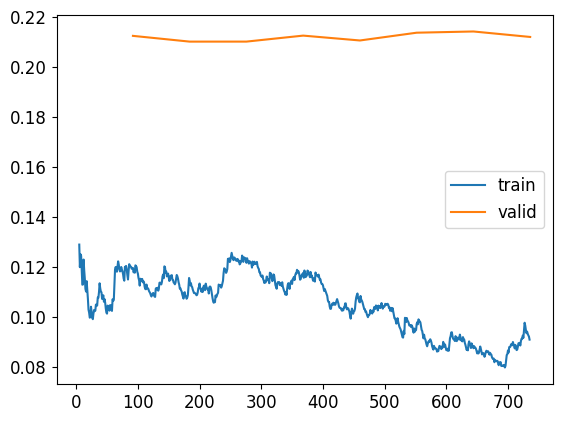

In [14]:
model.recorder.plot_loss()

## Exporting this bad boy:

In [42]:
model.export("37_pet_breeds_resnet34")

## Trying out the previous methods by with Resnet-50:

C:\Users\dwcar\.conda\envs\torchcuda_4\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.771529,0.386595,0.882273,01:07
1,0.426383,0.250479,0.926252,01:05
2,0.262367,0.192456,0.940460,01:04


SuggestedLRs(valley=3.630780702224001e-05)

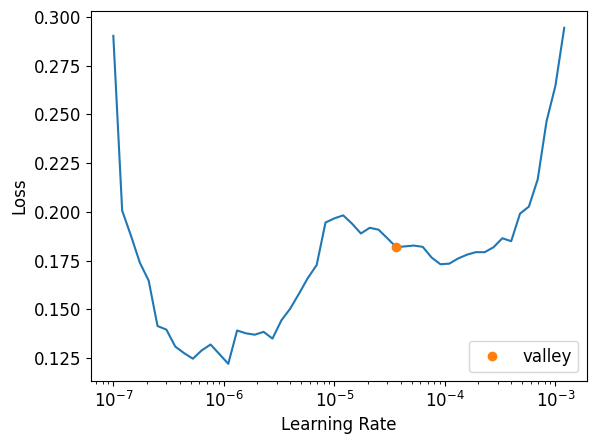

In [15]:
model_02 = vision_learner(loaders, resnet50, metrics = accuracy)
model_02.fit_one_cycle(3, 0.003)
model_02.unfreeze()
model_02.lr_find()

In [11]:
model_02.fit_one_cycle(8, lr_max=slice(0.000001, 0.0001))

epoch,train_loss,valid_loss,accuracy,time
0,0.169119,0.195362,0.941137,01:05
1,0.171374,0.184957,0.948579,01:07
2,0.143223,0.188635,0.941813,01:06
3,0.135552,0.174922,0.948579,01:06
4,0.117473,0.178075,0.945196,01:06
5,0.105965,0.175530,0.946549,01:07
6,0.093911,0.178862,0.947226,01:08
7,0.082387,0.175575,0.946549,01:05


In [16]:
interpretation_02 = ClassificationInterpretation.from_learner(model_02)

## Top confused breeds with Resnet-50:

In [17]:
confused02 = interpretation_02.most_confused(min_val=3)

for confusion in confused02:
  print(f"{confusion[0]} - {confusion[1]} - {confusion[2]} times.")

boxer - american_bulldog - 7 times.
Persian - Ragdoll - 5 times.
staffordshire_bull_terrier - american_pit_bull_terrier - 5 times.
Ragdoll - Birman - 4 times.
american_pit_bull_terrier - staffordshire_bull_terrier - 4 times.
miniature_pinscher - chihuahua - 4 times.
staffordshire_bull_terrier - american_bulldog - 4 times.
British_Shorthair - Ragdoll - 3 times.
beagle - basset_hound - 3 times.


In [41]:
model.export("37_pet_breeds_resnet50")

## Some predictions with Resnet-34:

Persian


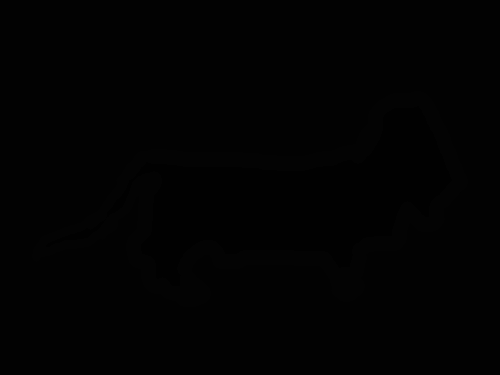

In [40]:
import PIL

pet_01 = get_image_files(path)[777]
print(model.predict(pet_01)[0])
img = PIL.Image.open(pet_01)
img

Path('annotations/trimaps/basset_hound_79.png')

## Some predictions with Resnet-34: